In [4]:
from google.colab import files
import zipfile

# Upload the dataset
uploaded = files.upload()

# Replace 'Deepdive.zip' with your file name
zip_file_name = 'Deepdive.zip'
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('Deepdive')

print("Dataset uploaded and extracted successfully!")


Saving Deepdive.zip to Deepdive.zip
Dataset uploaded and extracted successfully!


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
# Base directory
base_dir = 'Deepdive'

# Subdirectories
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Verify the directories
print(f"Train Directory: {train_dir}")
print(f"Validation Directory: {validation_dir}")
print(f"Test Directory: {test_dir}")


Train Directory: Deepdive/train
Validation Directory: Deepdive/validation
Test Directory: Deepdive/test


In [8]:
# Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Rescaling for Validation and Testing
validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Load Images Using ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = validation_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Display Class Labels
class_labels = train_generator.class_indices
print(f"Class Labels: {class_labels}")


Found 2667 images belonging to 33 classes.
Found 667 images belonging to 33 classes.
Found 660 images belonging to 33 classes.
Class Labels: {'Anthomastus Like coral': 0, 'Arborescent Stumpy Grey Branching Erect sponges': 1, 'Arborescent coral': 2, 'Attached Stony coral': 3, 'Bioturbation - Organism tests': 4, 'Bony fishes': 5, 'Colonial Unstalked Ascidian': 6, 'Crab': 7, 'Ctenophores jellies': 8, 'Cup-likes sponges': 9, 'Eels': 10, 'Feather stars': 11, 'Free-living coral': 12, 'General unknown biology': 13, 'Hermit Crab with Shell or Stone': 14, 'Irregular urchins': 15, 'Laminar Erect sponges': 16, 'Octopods': 17, 'Other anemones': 18, 'Prawns - Shrimps - Mysids': 19, 'Quill (Sea pen) coral': 20, 'Sea Cucumber': 21, 'Sea stars': 22, 'Sea urchins': 23, 'Sea whip coral': 24, 'Simple Branching coral': 25, 'Snake stars': 26, 'Squat lobsters': 27, 'Stalked Erect sponges': 28, 'True lobsters': 29, 'Tube anemones': 30, 'Tube worms': 31, 'Woody debris': 32}


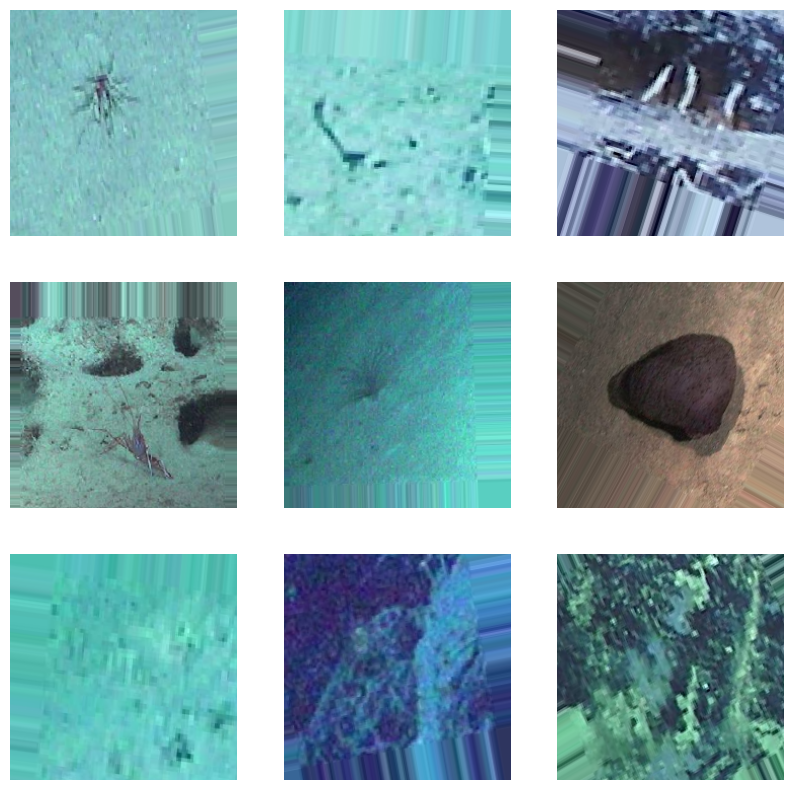

In [9]:
# Visualize Images from the Training Generator
x_batch, y_batch = next(train_generator)

# Plot first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.show()
